In [ ]:
# Google Colaboratoryで作業する場合はこちらも実行してください。
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
%cd "/content/drive/MyDrive/Colab Notebooks/GCI winter/最終課題/実行/対アメリカ企業"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/GCI winter/最終課題/実行/対アメリカ企業


In [ ]:
!pip install japanize_matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
record=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GCI winter/最終課題/実行/data/record.csv")
client=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GCI winter/最終課題/実行/data/client.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=003b39a7c98e9e2e03f06a28c2b05a58d35d8143ed228bd94b1d9d1fe93aab82
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize_matplotlib


In [ ]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         99643 non-null   float64
 1   mou_Mean         99643 non-null   float64
 2   totmrc_Mean      99643 non-null   float64
 3   da_Mean          99643 non-null   float64
 4   ovrmou_Mean      99643 non-null   float64
 5   ovrrev_Mean      99643 non-null   float64
 6   vceovr_Mean      99643 non-null   float64
 7   datovr_Mean      99643 non-null   float64
 8   roam_Mean        99643 non-null   float64
 9   change_mou       99109 non-null   float64
 10  change_rev       99109 non-null   float64
 11  drop_vce_Mean    100000 non-null  float64
 12  drop_dat_Mean    100000 non-null  float64
 13  blck_vce_Mean    100000 non-null  float64
 14  blck_dat_Mean    100000 non-null  float64
 15  unan_vce_Mean    100000 non-null  float64
 16  unan_dat_Mean    100000 non-null  float

In [ ]:
(record[record['churn']==0]['rev_Mean'].sum()*0.38+record[record['churn']==1]['rev_Mean'].sum()*0.38)/2

1111696.735500042

In [ ]:
record[record['churn']==1]['rev_Mean'].sum()*0.38

1090902.3026666786

In [ ]:
28707-1111696

-1082989

In [ ]:
2,231,359

In [ ]:
churn_loss=record[record['churn']==1]['rev_Mean'].sum()
churn_loss_99_ratio=record[record['churn']==1]['rev_Mean'].sum()*0.99
churn_loss_95_ratio=record[record['churn']==1]['rev_Mean'].sum()*0.95
churn_loss_90_ratio=record[record['churn']==1]['rev_Mean'].sum()*0.90
print(churn_loss)
print(churn_loss-churn_loss_99_ratio)
print(churn_loss-churn_loss_95_ratio)
print(churn_loss-churn_loss_90_ratio)

2870795.533333365
28707.955333333462
143539.77666666824
287079.5533333365


In [ ]:
churn_loss_90_ratio

2583715.9800000284

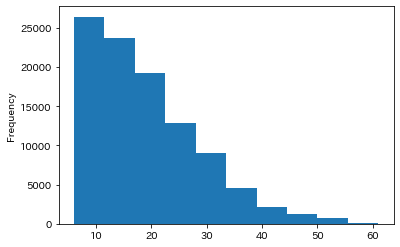

In [ ]:
record.months.plot.hist()

In [ ]:
record.churn.unique()

array([1, 0])

In [ ]:
record[record['months']<10]['churn'].value_counts()#68%が解約しない約7割

0    9590
1    4478
Name: churn, dtype: int64

In [ ]:
record[record['months']>=10]['churn'].value_counts()#68%が解約しない約7割

1    45084
0    40848
Name: churn, dtype: int64

In [ ]:
len(record[record['months']<10]['churn'])#68%が解約しない約7割

14068

In [ ]:
record[(record['months']>=10) & (record['churn']==1)]['rev_Mean'].mean()#10ヶ月以上の契約しなかった人たちの月の平均支払額

57.440068549407506

In [ ]:
record['months'].median()

16.0

In [ ]:
x=record[(record['months']>=10) & (record['churn']==1)]['rev_Mean'].mean()#10ヶ月以上の契約しなかった人たちが、仮に平均レベルの契約を続けたときの合計額
x*6*45084#この分失ってる

15537768.302888928

In [ ]:
x*6*40575.6#50%から40%解約率になったら失う額がこれくらいになる

13983991.472600035

In [ ]:
x*6*38321.4#50%から35%解約率になったら失う額がこれくらいになる

13207103.05745559

In [ ]:
15537768.302888928-13983991.472600035#この分利益が出る。(これを上回らない割引策)

1553776.8302888926

In [ ]:
1035851.2201925963<1553776.8302888926#失った学徒割り引いた分の合計損失額から

True

In [ ]:
record['churn'].value_counts()

0    50438
1    49562
Name: churn, dtype: int64

In [ ]:
record[(record['months']>=10) & (record['churn']==1)]['rev_Mean'].mean()#10月以内の一人ひとりの支払いの平均

57.440068549407506

In [ ]:
x=record[(record['months']>=10) & (record['churn']==1)]['rev_Mean']*0.9#割引後の10月以内の一人ひとりの支払いの平均
x.mean()

51.69606169446675

In [ ]:
(57.440068549407506-51.69606169446675)*5*45084#割引による損失額の合計2

1294814.0252407454

In [ ]:
(57.440068549407506-51.69606169446675)

5.744006854940757

In [ ]:
churn_month_loss=record[(record['churn']==1) & (record['months']<10)]['rev_Mean'].sum()
churn_month_loss

294838.219166636

In [ ]:
churn_loss=record[record['churn']==1]['rev_Mean'].sum()
churn_loss_99_ratio=record[record['churn']==1]['rev_Mean'].sum()*0.99
churn_loss_90_ratio=record[record['churn']==1]['rev_Mean'].sum()*0.90
print(churn_loss-churn_loss_99_ratio)
print(churn_loss_90_ratio-689764.048187002)

689764.048187002

In [ ]:
record[record['rev_Mean']<record['totmrc_Mean']].count()

rev_Mean           32364
mou_Mean           32364
totmrc_Mean        32364
da_Mean            32364
ovrmou_Mean        32364
ovrrev_Mean        32364
vceovr_Mean        32364
datovr_Mean        32364
roam_Mean          32364
change_mou         32234
change_rev         32234
drop_vce_Mean      32364
drop_dat_Mean      32364
blck_vce_Mean      32364
blck_dat_Mean      32364
unan_vce_Mean      32364
unan_dat_Mean      32364
plcd_vce_Mean      32364
plcd_dat_Mean      32364
recv_vce_Mean      32364
recv_sms_Mean      32364
comp_vce_Mean      32364
comp_dat_Mean      32364
custcare_Mean      32364
ccrndmou_Mean      32364
cc_mou_Mean        32364
inonemin_Mean      32364
threeway_Mean      32364
mou_cvce_Mean      32364
mou_cdat_Mean      32364
mou_rvce_Mean      32364
owylis_vce_Mean    32364
mouowylisv_Mean    32364
iwylis_vce_Mean    32364
mouiwylisv_Mean    32364
peak_vce_Mean      32364
peak_dat_Mean      32364
mou_peav_Mean      32364
mou_pead_Mean      32364
opk_vce_Mean       32364


In [ ]:
record['totmrc_Mean']

0        22.500
1        37.425
2        16.990
3        38.000
4        71.980
          ...  
99995       NaN
99996       NaN
99997       NaN
99998       NaN
99999       NaN
Name: totmrc_Mean, Length: 100000, dtype: float64

In [ ]:
record[record['months']>10]['churn'].value_counts()

1    43347
0    38272
Name: churn, dtype: int64

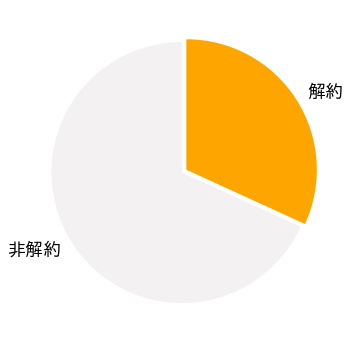

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams["font.size"] = 18
explode=[0.04,0]
colors=['#f3f1f1','orange']
plt.pie([9590,4478],counterclock=90,startangle=90,labels=['非解約','解約'],explode=explode,colors=colors)
plt.savefig('契約月10月未満の解約者の割合.png')
plt.show()

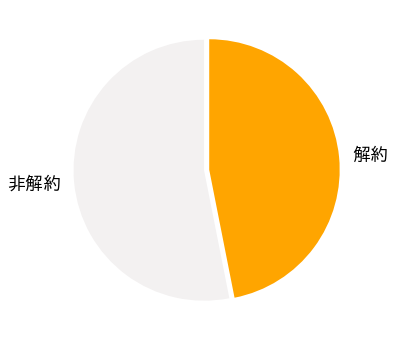

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams["font.size"] = 18
explode=[0.04,0]
colors=['#f3f1f1','orange']
plt.pie([43347,38272],counterclock=90,startangle=90,labels=['非解約','解約'],explode=explode,colors=colors)
plt.savefig('契約月10月以上の解約者の割合.png')
plt.show()

In [ ]:
churn_loss_99_ratio=record[record['churn']==1]['rev_Mean'].sum()*0.99

2842087.5780000314

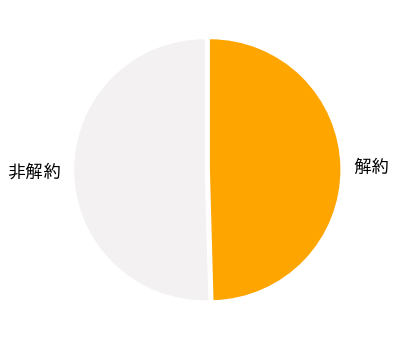

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams["font.size"] = 18
explode=[0.04,0]
colors=['#f3f1f1','orange']
plt.pie([50438,49562],counterclock=90,startangle=90,labels=['非解約','解約'],explode=explode,colors=colors)
plt.savefig('解約者の割合.png')
plt.show()

In [ ]:
rev_mean_churn_under_50=record[(record['churn']==1) & (record['rev_Mean'].isnull()==False) & (record['rev_Mean']<50)]['rev_Mean'].count()
rev_mean_churn_50_100=record[(record['churn']==1) & (record['rev_Mean'].isnull()==False) & (50<=record['rev_Mean']) & (record['rev_Mean']<100)]['rev_Mean'].count()
rev_mean_churn_100_200=record[(record['churn']==1) & (record['rev_Mean'].isnull()==False) & (100<=record['rev_Mean']) & (record['rev_Mean']<200)]['rev_Mean'].count()
rev_mean_churn_under_200=record[(record['churn']==1) & (record['rev_Mean'].isnull()==False) & (record['rev_Mean']>200)]['rev_Mean'].count()
rev_mean_churn_list=[rev_mean_churn_under_50,rev_mean_churn_50_100,rev_mean_churn_100_200,rev_mean_churn_under_200]
rev_mean_not_churn_under_50=record[(record['churn']==0) & (record['rev_Mean'].isnull()==False) & (record['rev_Mean']<50)]['rev_Mean'].count()
rev_mean_not_churn_50_100=record[(record['churn']==0) & (record['rev_Mean'].isnull()==False) & (50<=record['rev_Mean']) & (record['rev_Mean']<100)]['rev_Mean'].count()
rev_mean_not_churn_100_200=record[(record['churn']==0) & (record['rev_Mean'].isnull()==False) & (100<=record['rev_Mean']) & (record['rev_Mean']<200)]['rev_Mean'].count()
rev_mean_not_churn_under_200=record[(record['churn']==0) & (record['rev_Mean'].isnull()==False) & (record['rev_Mean']>200)]['rev_Mean'].count()
rev_mean_not_churn_list=[rev_mean_not_churn_under_50,rev_mean_not_churn_50_100,rev_mean_not_churn_100_200,rev_mean_not_churn_under_200]

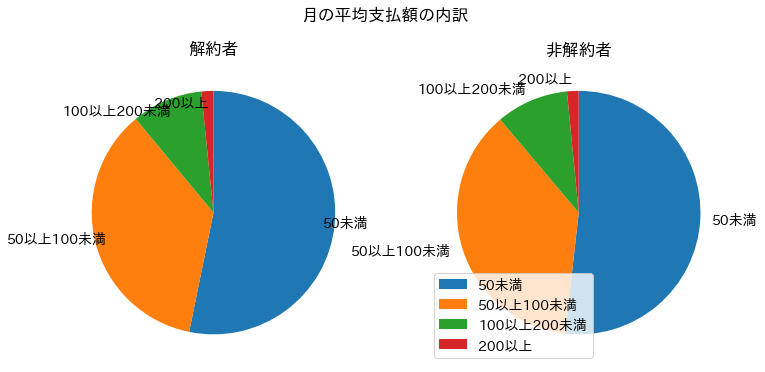

In [ ]:
labels=['50未満','50以上100未満','100以上200未満','200以上']
fig=plt.figure(figsize=(12,6))
plt.rcParams["font.size"] = 14
ax1=fig.add_subplot(121)
ax1.pie(rev_mean_churn_list,labels=labels,startangle=90,counterclock=False,labeldistance=0.9)
ax1.set_title('解約者')
ax2=fig.add_subplot(122)
ax2.pie(rev_mean_not_churn_list,labels=labels,startangle=90,counterclock=False)
ax2.set_title('非解約者')
plt.suptitle('月の平均支払額の内訳')
plt.savefig('解約者、非解約者それぞれの月の平均支払額の内訳')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


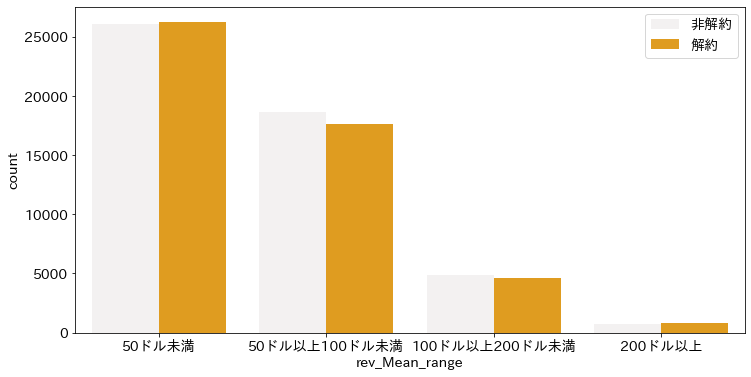

In [ ]:
record.loc[(record['rev_Mean']<50),'rev_Mean_range']='50ドル未満'
record.loc[(50<=record['rev_Mean']) & (record['rev_Mean']<100),'rev_Mean_range']='50ドル以上100ドル未満'
record.loc[(100<=record['rev_Mean']) & (record['rev_Mean']<200),'rev_Mean_range']='100ドル以上200ドル未満'
record.loc[(record['rev_Mean']>200),'rev_Mean_range']='200ドル以上'
plt.figure(figsize=(12,6))
colors=['#f3f1f1','orange']
plt.rcParams["font.size"] = 14
sns.countplot('rev_Mean_range',hue='churn',data=record,palette=colors,order=['50ドル未満','50ドル以上100ドル未満','100ドル以上200ドル未満','200ドル以上'])
plt.legend(['非解約','解約'])
plt.savefig('月の平均支払額の内訳')

In [ ]:
rev_mean_under_50

29.990000    2109
34.990000    1509
10.000000     953
30.000000     806
49.990000     792
             ... 
28.807500       1
12.205000       1
39.922500       1
21.352500       1
31.923333       1
Name: rev_Mean, Length: 12817, dtype: int64

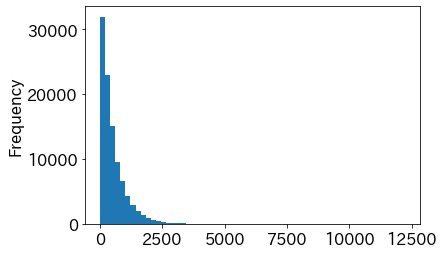

In [ ]:
record['mou_Mean'].plot.hist(bins=60)

In [ ]:
#解約者
print(record[(record['mou_Mean']<300) & (record['churn']==1)]['mou_Mean'].count())
print(record[(300<=record['mou_Mean']) & (record['mou_Mean']<1000) & (record['churn']==1)]['mou_Mean'].count())
print(record[(1000<=record['mou_Mean']) & (record['mou_Mean']<2000) & (record['churn']==1)]['mou_Mean'].count())
print(record[(2000<=record['mou_Mean']) & (record['churn']==1)]['mou_Mean'].count())

23028
19945
5446
898


In [ ]:
#非解約者
print(record[(record['mou_Mean']<300) & (record['churn']==0)]['mou_Mean'].count())
print(record[(300<=record['mou_Mean']) & (record['mou_Mean']<1000) & (record['churn']==0)]['mou_Mean'].count())
print(record[(1000<=record['mou_Mean']) & (record['mou_Mean']<2000) & (record['churn']==0)]['mou_Mean'].count())
print(record[(2000<=record['mou_Mean']) & (record['churn']==0)]['mou_Mean'].count())

20834
21769
6470
1253


In [ ]:
mou_mean_churn_under_300=record[(record['mou_Mean']<300) & (record['churn']==1)]['mou_Mean'].count()
mou_mean_churn_300_1000=record[(300<=record['mou_Mean']) & (record['mou_Mean']<1000) & (record['churn']==1)]['mou_Mean'].count()
mou_mean_churn_1000_2000=record[(1000<=record['mou_Mean']) & (record['mou_Mean']<2000) & (record['churn']==1)]['mou_Mean'].count()
mou_mean_churn_upper_2000=record[(2000<=record['mou_Mean']) & (record['churn']==1)]['mou_Mean'].count()
mou_mean_churn_list=[mou_mean_churn_under_300,mou_mean_churn_300_1000,mou_mean_churn_1000_2000,mou_mean_churn_upper_2000]
mou_mean_not_churn_under_300=record[(record['mou_Mean']<300) & (record['churn']==0)]['mou_Mean'].count()
mou_mean_not_churn_300_1000=record[(300<=record['mou_Mean']) & (record['mou_Mean']<1000) & (record['churn']==0)]['mou_Mean'].count()
mou_mean_not_churn_1000_2000=record[(1000<=record['mou_Mean']) & (record['mou_Mean']<2000) & (record['churn']==0)]['mou_Mean'].count()
mou_mean_not_churn_upper_2000=record[(2000<=record['mou_Mean']) & (record['churn']==0)]['mou_Mean'].count()
mou_mean_not_churn_list=[mou_mean_not_churn_under_300,mou_mean_not_churn_300_1000,mou_mean_not_churn_1000_2000,mou_mean_not_churn_upper_2000]

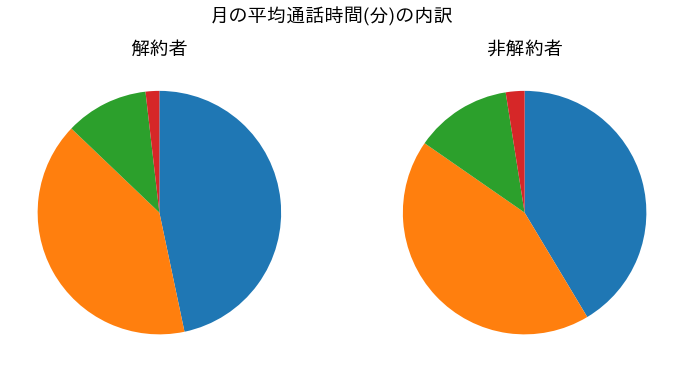

In [ ]:
labels=['300未満','300以上1000未満','1000以上2000未満','2000以上']
fig=plt.figure(figsize=(12,6))
plt.rcParams["font.size"] = 16
ax1=fig.add_subplot(121)
ax1.pie(mou_mean_churn_list,startangle=90,counterclock=False)
ax1.set_title('解約者')
ax2=fig.add_subplot(122)
ax2.pie(mou_mean_not_churn_list,startangle=90,counterclock=False)
ax2.set_title('非解約者')
plt.suptitle('月の平均通話時間(分)の内訳')
plt.savefig('解約者、非解約者それぞれの月の平均通話時間(分)の内訳')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


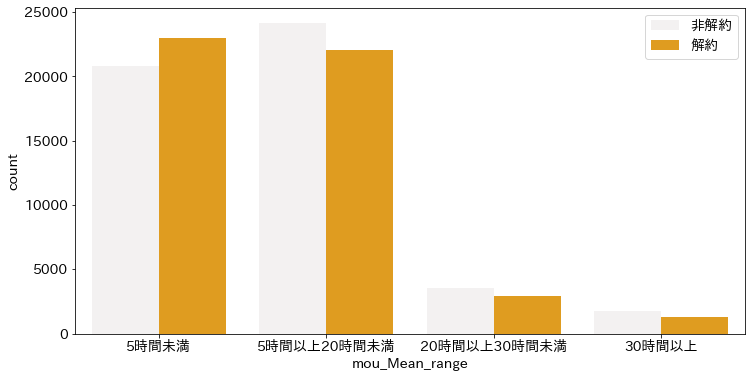

In [ ]:
record.loc[(record['mou_Mean']<300),'mou_Mean_range']='5時間未満'
record.loc[(300<=record['mou_Mean']) & (record['mou_Mean']<1200),'mou_Mean_range']='5時間以上20時間未満'
record.loc[(1200<=record['mou_Mean']) & (record['mou_Mean']<1800),'mou_Mean_range']='20時間以上30時間未満'
record.loc[(record['mou_Mean']>1800),'mou_Mean_range']='30時間以上'
plt.figure(figsize=(12,6))
colors=['#f3f1f1','orange']
plt.rcParams["font.size"] = 14
sns.countplot('mou_Mean_range',hue='churn',data=record,palette=colors,order=['5時間未満','5時間以上20時間未満','20時間以上30時間未満','30時間以上'])
plt.legend(['非解約','解約'])
plt.savefig('月の平均使用時間の内訳')

In [ ]:
record['change_mou'].value_counts().sort_values(ascending=False).head(30)

 0.00    1756
-0.25     275
-0.50     214
-2.00     199
-1.00     188
-0.75     185
-1.25     183
-1.50     181
-1.75     170
-2.50     163
 0.50     157
-2.75     157
-3.25     156
-6.75     156
-5.00     155
-3.75     151
-5.25     150
-8.25     150
-4.25     149
-3.00     148
-4.00     147
-9.00     146
-3.50     146
-9.25     146
-7.75     146
 1.25     146
-4.75     145
-2.25     144
-4.50     143
 0.75     143
Name: change_mou, dtype: int64

In [ ]:
record['change_mou'].describe()

count    99109.000000
mean       -13.933818
std        276.087509
min      -3875.000000
25%        -87.000000
50%         -6.250000
75%         63.000000
max      31219.250000
Name: change_mou, dtype: float64

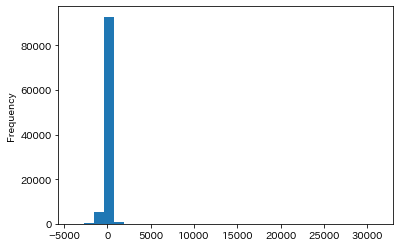

In [ ]:
record['change_mou'].plot.hist(bins=30)

In [ ]:
print(record[(record['change_mou']>=0) & (record['change_mou']<150) & (record['churn']==1)]['change_mou'].count())
print(record[(record['change_mou']>=-150) & (record['change_mou']<0) & (record['churn']==1)]['change_mou'].count())
print(record[(record['change_mou']>=150) & (record['churn']==1)]['change_mou'].count())
print(record[(record['change_mou']<=-150) & (record['churn']==1)]['change_mou'].count())

14896
18603
6517
8888


In [ ]:
print(record[(record['change_mou']>=0) & (record['change_mou']<150) & (record['churn']==0)]['change_mou'].count())
print(record[(record['change_mou']>=-150) & (record['change_mou']<0) & (record['churn']==0)]['change_mou'].count())
print(record[(record['change_mou']>=150) & (record['churn']==0)]['change_mou'].count())
print(record[(record['change_mou']<=-150) & (record['churn']==0)]['change_mou'].count())

16800
18776
7245
7423


In [ ]:
#解約者
change_mou_0_150_churn=record[(record['change_mou']>=0) & (record['change_mou']<150) & (record['churn']==1)]['change_mou'].count()
change_mou_minus150_0_churn=record[(record['change_mou']>=-150) & (record['change_mou']<0) & (record['churn']==1)]['change_mou'].count()
change_mou_upper_150_churn=record[(record['change_mou']>=150) & (record['churn']==1)]['change_mou'].count()
change_mou_lower_minus150_churn=record[(record['change_mou']<=-150) & (record['churn']==1)]['change_mou'].count()
change_mou_churn_list=[change_mou_0_150_churn,change_mou_minus150_0_churn,change_mou_upper_150_churn,change_mou_lower_minus150_churn]
#非解約者
change_mou_0_150_notchurn=record[(record['change_mou']>=0) & (record['change_mou']<150) & (record['churn']==0)]['change_mou'].count()
change_mou_minus150_0_notchurn=record[(record['change_mou']>=-150) & (record['change_mou']<0) & (record['churn']==0)]['change_mou'].count()
change_mou_upper_150_notchurn=record[(record['change_mou']>=150) & (record['churn']==0)]['change_mou'].count()
change_mou_lower_minus150_notchurn=record[(record['change_mou']<=-150) & (record['churn']==0)]['change_mou'].count()
change_mou_notchurn_list=[change_mou_0_150_notchurn,change_mou_minus150_0_notchurn,change_mou_upper_150_notchurn,change_mou_lower_minus150_notchurn]

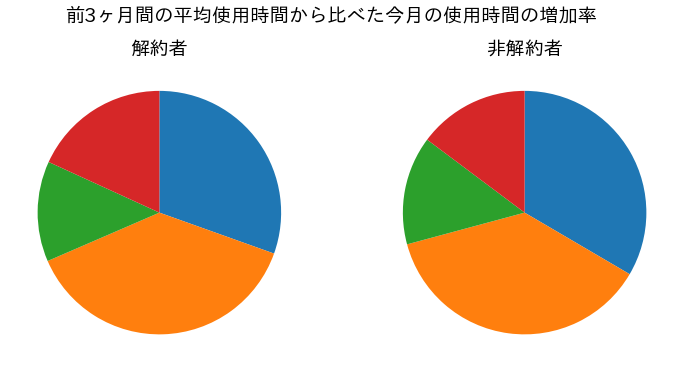

In [ ]:
labels=['0%以上150%未満','-150%以上0%未満','150%以上','-150%未満']
fig=plt.figure(figsize=(12,6))
plt.rcParams["font.size"] = 16
ax1=fig.add_subplot(121)
ax1.pie(change_mou_churn_list,startangle=90,counterclock=False)
ax1.set_title('解約者')
ax2=fig.add_subplot(122)
ax2.pie(change_mou_notchurn_list,startangle=90,counterclock=False)
ax2.set_title('非解約者')
plt.suptitle('前3ヶ月間の平均使用時間から比べた今月の使用時間の増加率')
plt.savefig('前3ヶ月間の平均使用時間から比べた今月の使用時間の増加率')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


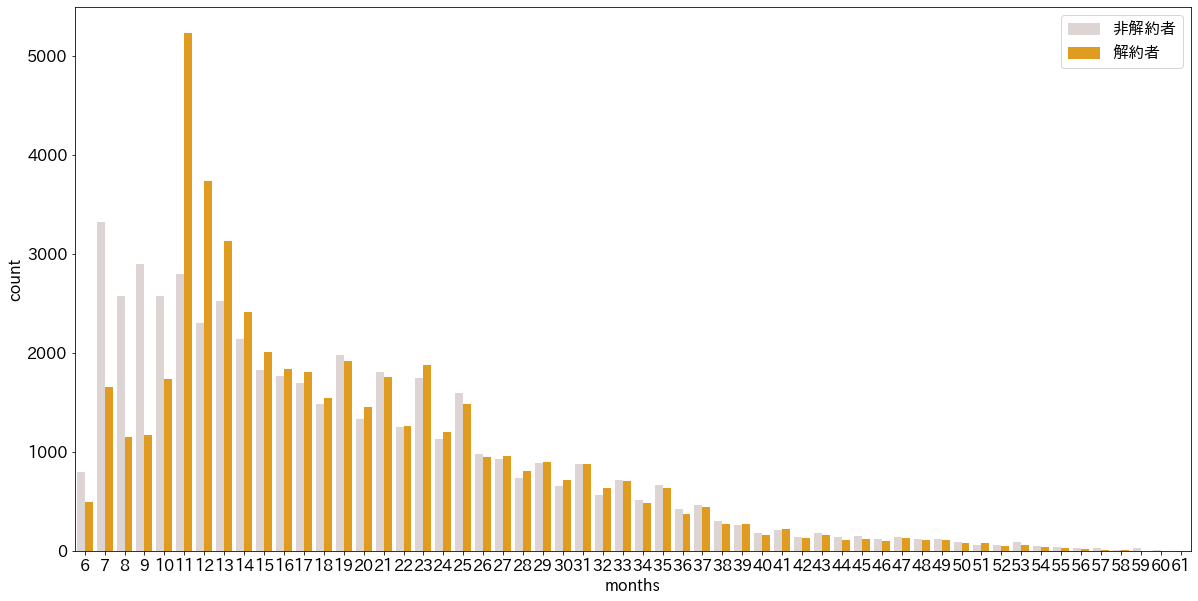

In [ ]:
plt.figure(figsize=(20,10))
colors=['#dfd2d2','orange']
sns.countplot('months',hue='churn',data=record,palette=colors)
plt.rcParams["font.size"] = 16
plt.legend(['非解約者','解約者'])
plt.savefig('契約継続月数の分布.png')
plt.show()

In [ ]:
record['churn'].value_counts()

0    50438
1    49562
Name: churn, dtype: int64